### Lab 3 - FIFA World Cup Qatar 2022

In [1]:
from IPython.display import display
import urllib3
import json
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = [15,10]

This Jupyter notebook provides an example of what you can do using data published on NGED's connected data portal. This specific Lab will walk you through extracting a number of diverse datasets through API calls and visualising them using Python.

### Loading Demand Data

NGED's connected data portal is a rich and diverse repository of datasets that is constantly growing and evolving. One of the key benefits of the portal is that it enables API requests. One of the datasets we will be utilising for this lab is the demand data. 

In [2]:
# Create a PoolManager instance for sending requests.
http = urllib3.PoolManager()

# This is the dataset url
url = 'https://connecteddata.nationalgrid.co.uk/api/3/action/datastore_search?resource_id=833c4867-69bf-4afd-8629-068844f22b4e&limit=300000'  

# Calls the endpoint
response = http.request('GET',url)

# Use the json module to load CKAN's response into a dictionary.
response_dict = json.loads(response.data)

# Display the first record  in the response
display(response_dict['result']['records'][0])

{'_id': 1,
 'Datetime': '2022-11-21T00:00:00',
 'EastMidlands': 2450.29544,
 'SouthWales': 974.833928,
 'SouthWest': 1167.6967399999999,
 'WestMidlands': 2392.3646}

In [3]:
# Construct DataFrame from a dictionary
df = pd.DataFrame(response_dict['result']['records'])

# Set the index to _id 
df.set_index(['_id'],inplace=True)

# Set datetime column

df.Datetime = pd.to_datetime(df.Datetime)

# Display the dataframe
display(df)

,Datetime,EastMidlands,SouthWales,SouthWest,WestMidlands
_id,,,,,
1,2022-11-21 00:00:00,2450.29544,974.833928,1167.69674,2392.364600
2,2022-11-21 00:05:00,2456.23446,976.915344,1198.41714,2398.468767
3,2022-11-21 00:10:00,2451.45516,966.743542,1214.39962,2397.501660
4,2022-11-21 00:15:00,2449.30434,974.759158,1218.68892,2398.115650
5,2022-11-21 00:20:00,2453.07280,972.488898,1216.61688,2402.622200
...,...,...,...,...,...
284,2022-11-21 23:35:00,2634.02956,1035.597160,1159.91364,2503.032480
285,2022-11-21 23:40:00,2610.41434,1050.068560,1146.99660,2490.330020
286,2022-11-21 23:45:00,2597.96934,1087.367360,1144.03964,2488.344980


In [4]:
# Generate and display descriptive statistics
display(df.describe())

,EastMidlands,SouthWales,SouthWest,WestMidlands
count,288.000000,288.000000,288.000000,288.000000
mean,3305.510357,1298.092954,1473.490595,3092.673685
std,586.017126,232.446050,274.039876,514.420466
min,2362.145000,947.479652,1037.282100,2310.445800
25%,2597.558875,1024.985657,1199.642025,2477.567095
50%,3555.165080,1384.999050,1549.044190,3267.813360
75%,3801.495135,1501.814327,1650.778990,3562.714640
max,4037.719140,1634.377080,1985.495600,3754.598320


### Visualise Demand Data

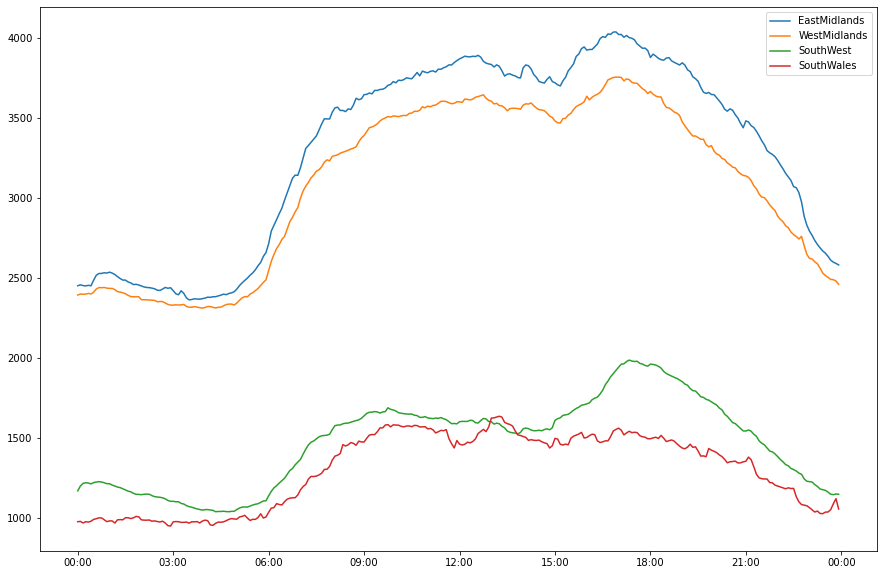

In [5]:
# Plot each licence area
fig,ax = plt.subplots()

# Plot each line
ax.plot(df['Datetime'], df['EastMidlands'],label='EastMidlands')
ax.plot(df['Datetime'], df['WestMidlands'],label='WestMidlands')
ax.plot(df['Datetime'], df['SouthWest'],label='SouthWest')
ax.plot(df['Datetime'], df['SouthWales'],label='SouthWales')

# Setting the number of ticks
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))

#add a legend
ax.legend()